In [47]:
import pandas as pd                     #to read file
import numpy as np                      #to cal
import matplotlib.pyplot as plt         #plot 
from mpl_toolkits.mplot3d import Axes3D #for 3D plot
from sklearn.cluster import KMeans      #use kmeans
from sklearn.metrics import silhouette_samples, silhouette_score #to cal the silhouette_score

#The data is from  
#https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+(North+Jutland,+Denmark)

In [48]:
try1 = pd.read_csv('3D_spatial_network.txt',sep = ",",encoding = 'utf-8') #read file
try1.columns=["OSM_ID", "LONGITUDE", "LATITUDE", "ALTITUDE"]              #set the columns
del try1['OSM_ID']                                                        #delete the id part that we don't have to use 

In [49]:
print(try1.info()) #show the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434873 entries, 0 to 434872
Data columns (total 3 columns):
LONGITUDE    434873 non-null float64
LATITUDE     434873 non-null float64
ALTITUDE     434873 non-null float64
dtypes: float64(3)
memory usage: 10.0 MB
None


# K-Means
## silhouette_score
    The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values 
    generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
    We have to check how many clusters does the dataset be suit for . So, we must calculate the result,and we have 
    to compare with each other to choose the larger one.

http://phoebepan.cn/2017/05/05/silhouette%20analysis/

In [50]:
#let try for 2~10
for n_clusters in range(2,10):  
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)                                    #usekmeans 
    cluster_labels = clusterer.fit_predict(matrix)                                                #get the labels
    silhouette_avg = silhouette_score(matrix, cluster_labels,metric='euclidean', sample_size=100) #cal the silhouette_score
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)     #print the result

For n_clusters = 2 The average silhouette_score is : 0.6463500280767458
For n_clusters = 3 The average silhouette_score is : 0.5360695905674899
For n_clusters = 4 The average silhouette_score is : 0.5533668219064501
For n_clusters = 5 The average silhouette_score is : 0.5531494150852821
For n_clusters = 6 The average silhouette_score is : 0.5287361803678889
For n_clusters = 7 The average silhouette_score is : 0.5014078853028613
For n_clusters = 8 The average silhouette_score is : 0.4960610494868001
For n_clusters = 9 The average silhouette_score is : 0.49742633299878486


From the result above,we know that two clusters has a higher score. So in the following process , we will choose "2" to do kmeans. 

In [51]:
n_clusters = 2  # number of clusters
clusterer = KMeans(n_clusters=n_clusters, random_state=10)  #usekmeans 
cluster_labels = clusterer.fit_predict(matrix)              #get the labels
#silhouette_avg = silhouette_score(matrix, cluster_labels,metric='euclidean', sample_size=100)
#print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6662841878361396


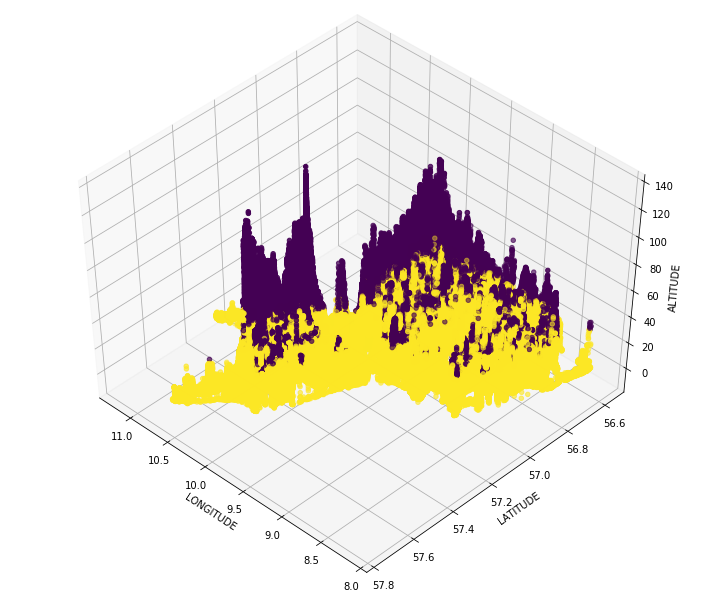

In [53]:
fig = plt.figure(1, figsize=(10, 8)) # set plot size
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134) # set for 3d plot
ax.scatter(try1.LONGITUDE[:], try1.LATITUDE[:], try1.ALTITUDE[:],c=cluster_labels) #set the data

ax.set_zlabel('ALTITUDE')   # set_zlabel
ax.set_ylabel('LATITUDE')   # set_ylabel
ax.set_xlabel('LONGITUDE')  # set_xlabel
plt.show()                  # show

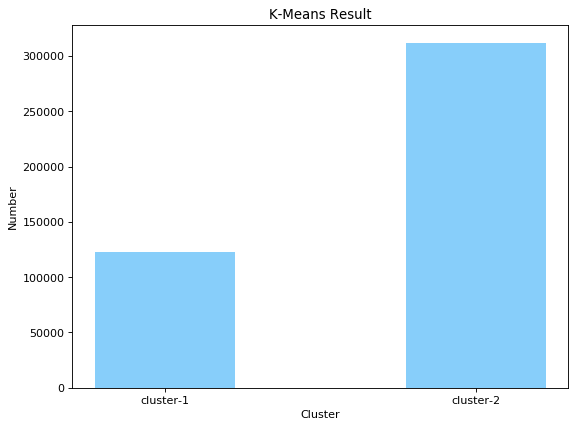

In [54]:

plt.figure(figsize=(8, 6), dpi=80)  # set fig
plt.subplot(1, 1, 1)                # set the plot size
N = 2                               # bar numbers 
values = (np.sum(cluster_labels == 0), np.sum(cluster_labels == 1)) # set values for dirrerent bars

index = np.arange(N)                                                # num of each bar
width = 0.45                                                        # width of the bar
p2 = plt.bar(index, values, width, label="--", color="#87CEFA")     # plot set the color

plt.xlabel('Cluster')                               # set xlabel
plt.ylabel('Number')                                # set ylabel
plt.title('K-Means Result')                         # set title
plt.xticks(index, ('cluster-1', 'cluster-2'))       # set the name of each bar
plt.yticks(np.arange(0, 350000, 50000))             # from 0~35000(50000 for each separate)
#plt.legend(loc="upper right")
plt.show()                                          #show